In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#Load image
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img


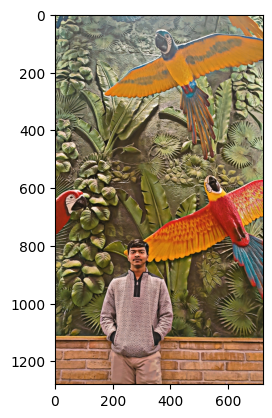

In [53]:
 filename = "1000026917.jpg"
 img = read_file(filename)

 org_img = np.copy(img)


In [54]:
#Create Edge Mask
 #input: Input Image
 #Output: Edge of Images
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

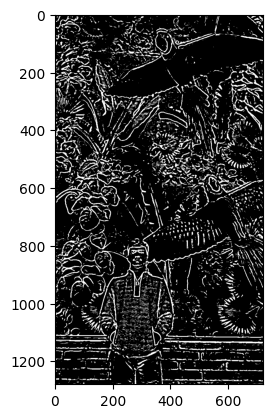

In [55]:
line_size, blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap= "binary")
plt.show()

In [56]:
#Reduce the Color Palette
def color_quantization(img, k):
  # Transform the image
  data = np.float32(img).reshape((-1,3))

  # Determine Criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  # Implementing K-means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result =  center[label.flatten()]
  result = result.reshape(img.shape)
  return result

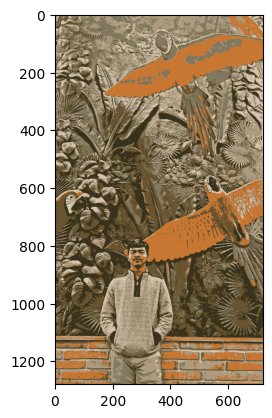

In [57]:
img  = color_quantization(img, k=6)
plt.imshow(img)
plt.show()

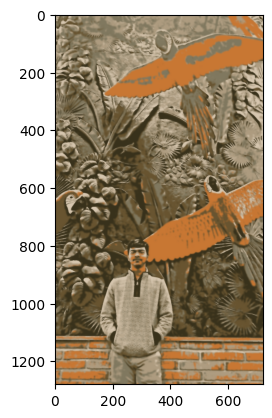

In [58]:
# Reduce the noise

blurred = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [59]:
#Combine Edge Mask with the quantiz img
def cartoon():
  c = cv2.bitwise_and(blurred,blurred, mask= edges)
  plt.imshow(c)
  plt.show()
  plt.imshow(org_img)
  plt.show()



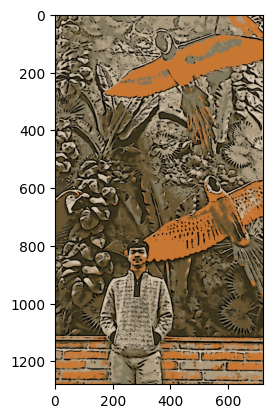

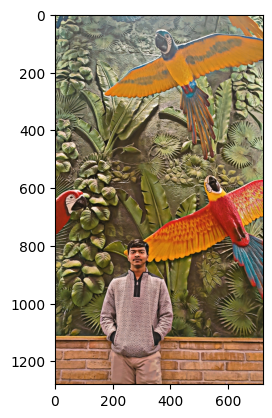

In [60]:
cartoon()